He seleccionado el siguiente dataset :

### Top 200 Spotify Songs Dataset

Este dataset contiene información sobre las listas diarias de las 200 canciones más populares de Spotify.

### Clase en el Dataset

Para identificar de manera única cada fila en este dataset, he considerado las siguientes opciones como posibles atributos de clase:

1. **Combinación de Título y Artistas**: Combinación para identificar canciones de forma única.
El título por sí solo puede ser repetido, ya que varias canciones pueden compartir el mismo nombre. Además, un artista puede tener múltiples canciones. Al unir ambos atributos, se minimiza la posibilidad de confusiones, aumentando la probabilidad de obtener un identificador único.

In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/TAREAS U/8vo semestre/IA/Apoyo 1er parcial/Spotify_Dataset_V3.csv', delimiter=';')
# Convertir la columna 'Artists' en listas
df['Artists'] = df['Artists'].str.split('-')

print(df.head())

Mounted at /content/drive
   Rank            Title                       Artists        Date  \
0     1  Ella Baila Sola  [Eslabon Armado, Peso Pluma]  29/05/2023   
1     1  Ella Baila Sola  [Eslabon Armado, Peso Pluma]  29/05/2023   
2     2   WHERE SHE GOES                   [Bad Bunny]  29/05/2023   
3     3  La Bebe - Remix       [Yng Lvcas, Peso Pluma]  29/05/2023   
4     3  La Bebe - Remix       [Yng Lvcas, Peso Pluma]  29/05/2023   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
1         0.668   0.758   -5176.0        0.033         0.483   
2         0.652   0.800   -4019.0        0.061         0.143   
3         0.812   0.479   -5678.0        0.333         0.213   
4         0.812   0.479   -5678.0        0.333         0.213   

   Instrumentalness  Valence # of Artist   Artist (Ind.) # of Nationality  \
0             0.000    0.834    Artist 1  Eslabon Armado    Nationality 1   
1             

In [2]:
def detalles(df):
    # Número de columnas
    numero_columnas = df.shape[1]

    # Nombres de las columnas
    nombres_columnas = df.columns.tolist()

    # Número de filas
    numero_filas = df.shape[0]

    print(f"Número de columnas: {numero_columnas}")
    print("Nombres de las columnas:", nombres_columnas)
    print(f"Número de filas: {numero_filas}")


detalles(df)

Número de columnas: 20
Nombres de las columnas: ['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality', 'Nationality', 'Continent', 'Points (Total)', 'Points (Ind for each Artist/Nat)', 'id', 'Song URL']
Número de filas: 23181


In [6]:
 # Selecciona columnas que son numéricas
def explorar_columnas_numericas(df):

    columnas_numericas = df.select_dtypes(include=['number']).columns

    for col in columnas_numericas:
        num_totales = len(df[col])  # Número total de valores
        num_unicos = df[col].nunique()  # Número de valores únicos
        valores_unicos = df[col].unique()  # Valores únicos

        print(f"Columna: {col}")
        print(f"Número total de valores: {num_totales}")
        print(f"Número de valores únicos: {num_unicos}")

        print("---")

# Explorar columnas numéricas
explorar_columnas_numericas(df)


Columna: Rank
Número total de valores: 23181
Número de valores únicos: 200
---
Columna: Danceability
Número total de valores: 23181
Número de valores únicos: 302
---
Columna: Energy
Número total de valores: 23181
Número de valores únicos: 332
---
Columna: Loudness
Número total de valores: 23181
Número de valores únicos: 446
---
Columna: Speechiness
Número total de valores: 23181
Número de valores únicos: 171
---
Columna: Acousticness
Número total de valores: 23181
Número de valores únicos: 329
---
Columna: Instrumentalness
Número total de valores: 23181
Número de valores únicos: 44
---
Columna: Valence
Número total de valores: 23181
Número de valores únicos: 363
---
Columna: Points (Total)
Número total de valores: 23181
Número de valores únicos: 200
---
Columna: Points (Ind for each Artist/Nat)
Número total de valores: 23181
Número de valores únicos: 420
---


## a. Percentiles y Cuartiles
Sin el uso de librerías en Python, programe el percentil y cuartil de cada columna.

### Cuartil
Un **cuartil** divide un conjunto de datos ordenados en cuatro partes iguales. Se representan como:
- **Q1 (primer cuartil)**: 25% de los datos son menores o iguales a este valor.
- **Q2 (segundo cuartil o mediana)**: 50% de los datos son menores o iguales a este valor.
- **Q3 (tercer cuartil)**: 75% de los datos son menores o iguales a este valor.

### Ejemplo
Si tienes un conjunto de datos y Q1 es 10, esto significa que el 25% de los datos son iguales o menores a 10.


In [8]:
def calcular_cuartiles(df):
    columnas_numericas = df.select_dtypes(include=['number']).columns

    for col in columnas_numericas:
        datos = sorted(df[col].dropna())
        n = len(datos)


        q1 = datos[int(n * 0.25)] if n * 0.25 < n else None
        q2 = datos[int(n * 0.5)] if n * 0.5 < n else None
        q3 = datos[int(n * 0.75)] if n * 0.75 < n else None


        print(f"Columna: {col}")
        print(f"Primer Cuartil (Q1): {q1}")
        print(f"Segundo Cuartil (Q2/Mediana): {q2}")
        print(f"Tercer Cuartil (Q3): {q3}")
        print("---")


calcular_cuartiles(df)



Columna: Rank
Primer Cuartil (Q1): 47
Segundo Cuartil (Q2/Mediana): 97
Tercer Cuartil (Q3): 150
---
Columna: Danceability
Primer Cuartil (Q1): 0.573
Segundo Cuartil (Q2/Mediana): 0.686
Tercer Cuartil (Q3): 0.777
---
Columna: Energy
Primer Cuartil (Q1): 0.549
Segundo Cuartil (Q2/Mediana): 0.669
Tercer Cuartil (Q3): 0.766
---
Columna: Loudness
Primer Cuartil (Q1): -6769.0
Segundo Cuartil (Q2/Mediana): -5264.0
Tercer Cuartil (Q3): -3882.0
---
Columna: Speechiness
Primer Cuartil (Q1): 0.039
Segundo Cuartil (Q2/Mediana): 0.054
Tercer Cuartil (Q3): 0.101
---
Columna: Acousticness
Primer Cuartil (Q1): 0.05
Segundo Cuartil (Q2/Mediana): 0.152
Tercer Cuartil (Q3): 0.365
---
Columna: Instrumentalness
Primer Cuartil (Q1): 0.0
Segundo Cuartil (Q2/Mediana): 0.0
Tercer Cuartil (Q3): 0.0
---
Columna: Valence
Primer Cuartil (Q1): 0.355
Segundo Cuartil (Q2/Mediana): 0.51
Tercer Cuartil (Q3): 0.706
---
Columna: Points (Total)
Primer Cuartil (Q1): 51
Segundo Cuartil (Q2/Mediana): 104
Tercer Cuartil (Q3):

### Percentil
Un **percentil** divide un conjunto de datos ordenados en 100 partes iguales. Se representa como:
### Ejemplo
Si el percentil 25 (P25) es 15, esto significa que el 25% de los datos son iguales o menores a 15.


In [5]:
def calcular_percentiles(df, percentiles=[25, 50, 75]):
    columnas_numericas = df.select_dtypes(include=['number']).columns

    for col in columnas_numericas:
        datos = sorted(df[col].dropna())  # Ordenar los datos y eliminar NaN
        n = len(datos)

        # Cálculo de percentiles
        print(f"Columna: {col}")
        for p in percentiles:
            index = int(n * (p / 100))
            percentile_value = datos[index] if index < n else None
            print(f"Percentil {p}: {percentile_value}")
        print("---")

# Usar la función para calcular percentiles
calcular_percentiles(df)


Columna: Rank
Percentil 25: 47
Percentil 50: 97
Percentil 75: 150
---
Columna: Danceability
Percentil 25: 0.573
Percentil 50: 0.686
Percentil 75: 0.777
---
Columna: Energy
Percentil 25: 0.549
Percentil 50: 0.669
Percentil 75: 0.766
---
Columna: Loudness
Percentil 25: -6769.0
Percentil 50: -5264.0
Percentil 75: -3882.0
---
Columna: Speechiness
Percentil 25: 0.039
Percentil 50: 0.054
Percentil 75: 0.101
---
Columna: Acousticness
Percentil 25: 0.05
Percentil 50: 0.152
Percentil 75: 0.365
---
Columna: Instrumentalness
Percentil 25: 0.0
Percentil 50: 0.0
Percentil 75: 0.0
---
Columna: Valence
Percentil 25: 0.355
Percentil 50: 0.51
Percentil 75: 0.706
---
Columna: Points (Total)
Percentil 25: 51
Percentil 50: 104
Percentil 75: 154
---
Columna: Points (Ind for each Artist/Nat)
Percentil 25: 30.0
Percentil 50: 64.0
Percentil 75: 94.5
---


# Análisis de Distribuciones

¿Qué distribución se puede aplicar en su caso (normal, Bernoulli, gaussiana, Poisson, otros)? Indique la razón de su uso graficando con Matplotlib.



## Fitter

es una librería de Python que facilita el ajuste automático de diversas distribuciones de probabilidad a conjuntos de datos numéricos, permitiendo evaluar cuál se adapta mejor utilizando criterios estadísticos como AIC y BIC. **AIC (Criterio de Información de Akaike)** penaliza modelos más complejos para evitar el sobreajuste, mientras que **BIC (Criterio de Información Bayesiano)** hace lo mismo pero con una penalización más fuerte por la complejidad, siendo más conservador en la selección de modelos. Ambos criterios ayudan a seleccionar el modelo que equilibra ajuste y simplicidad.


In [12]:
!pip install scipy fitter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 85.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


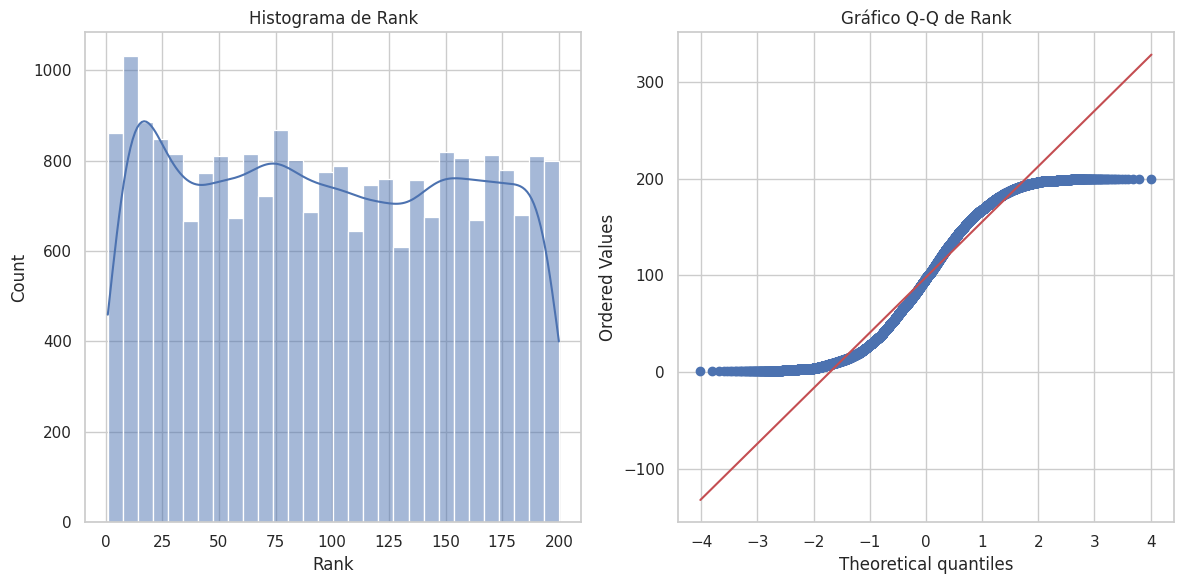

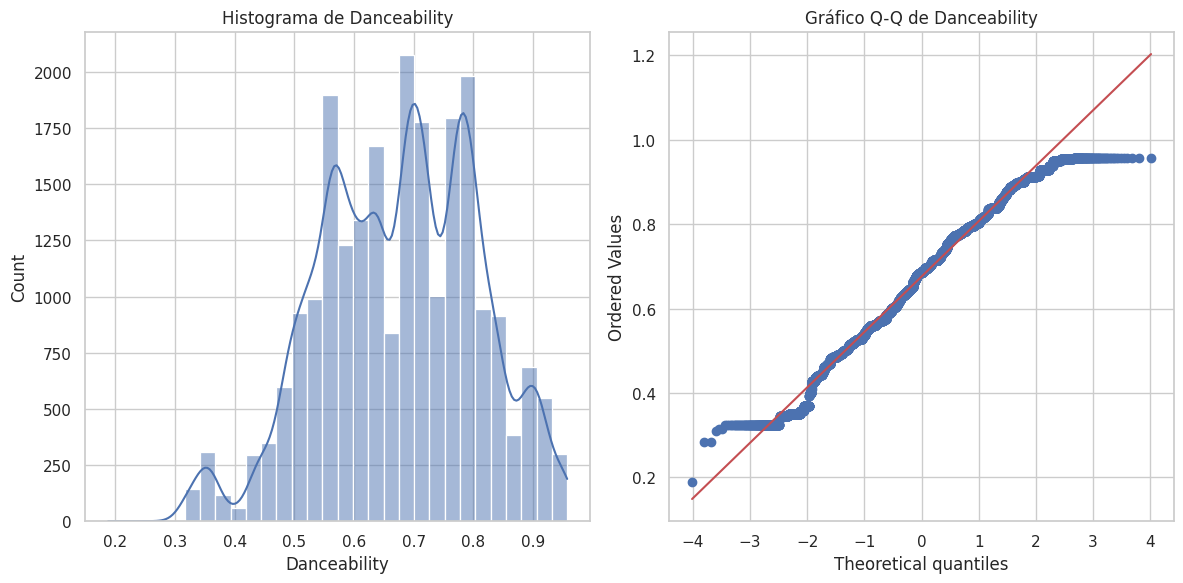

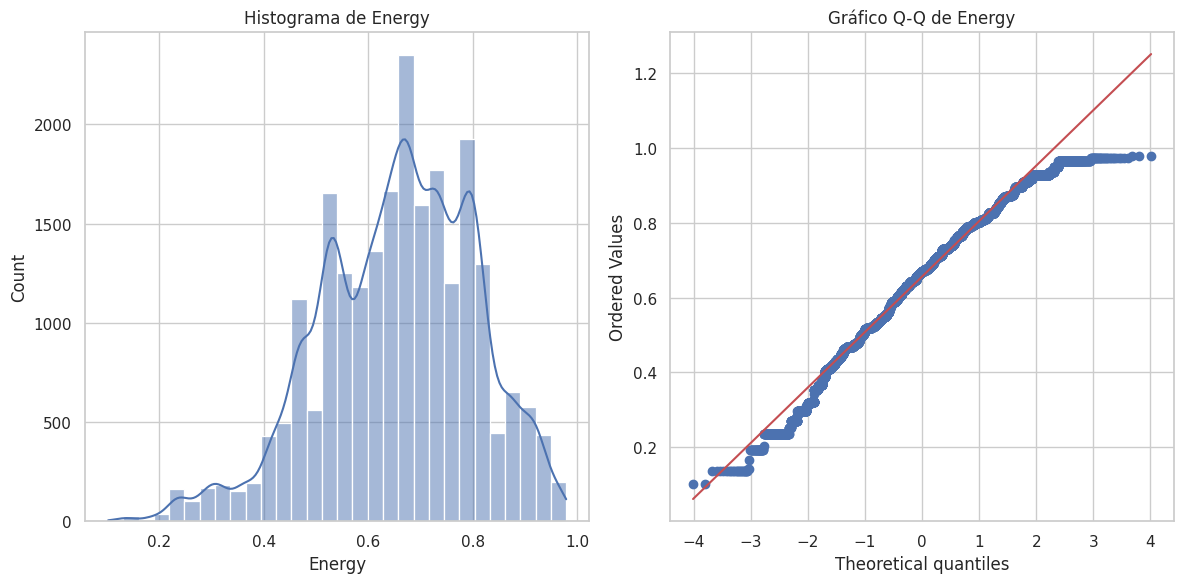

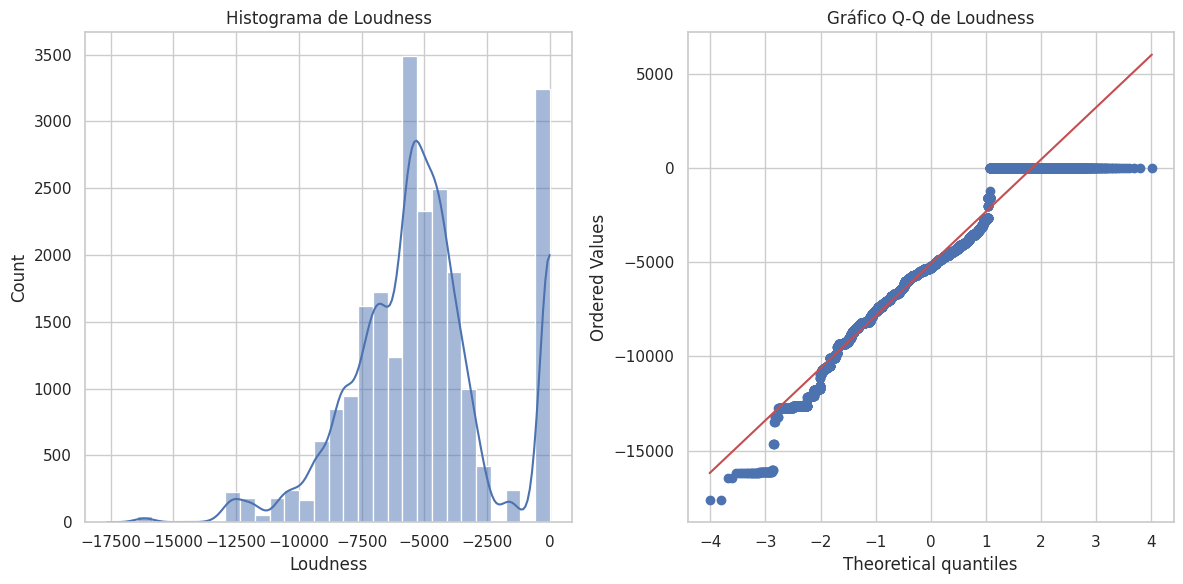

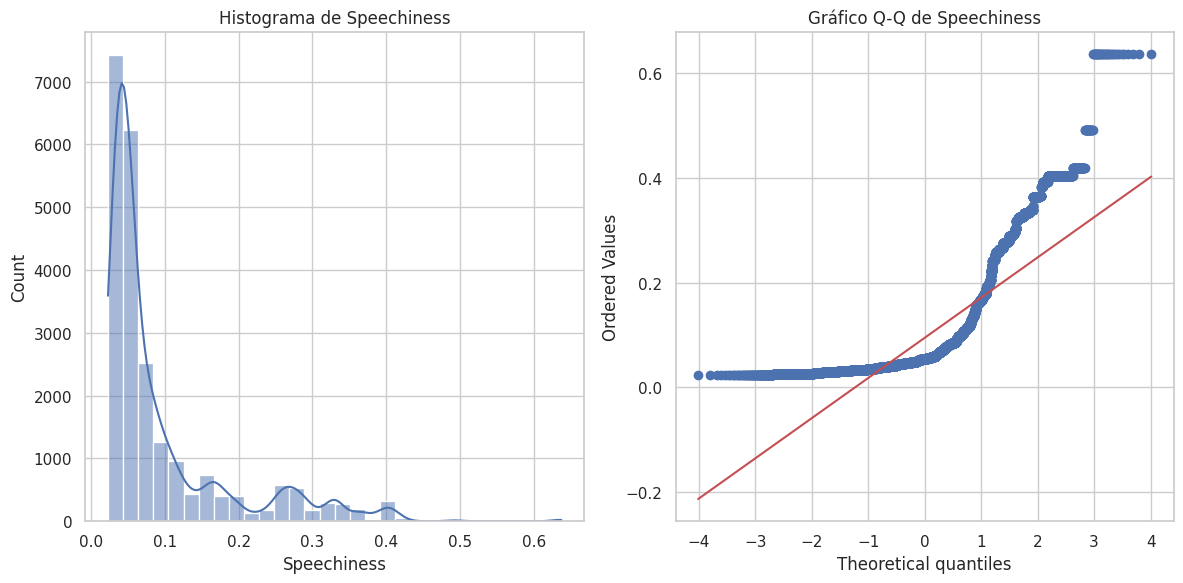

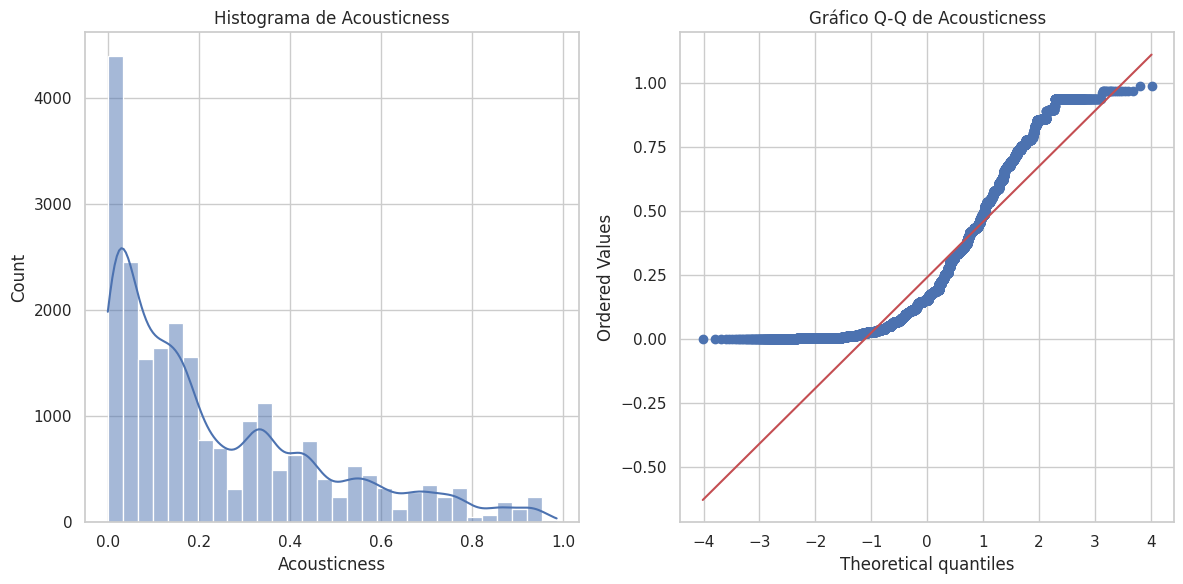

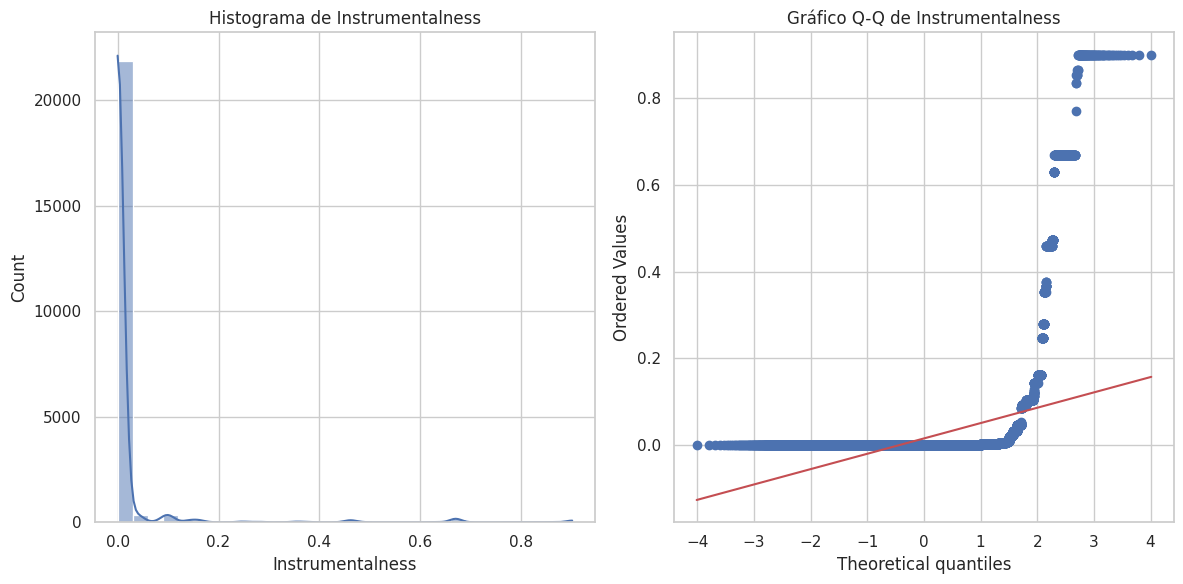

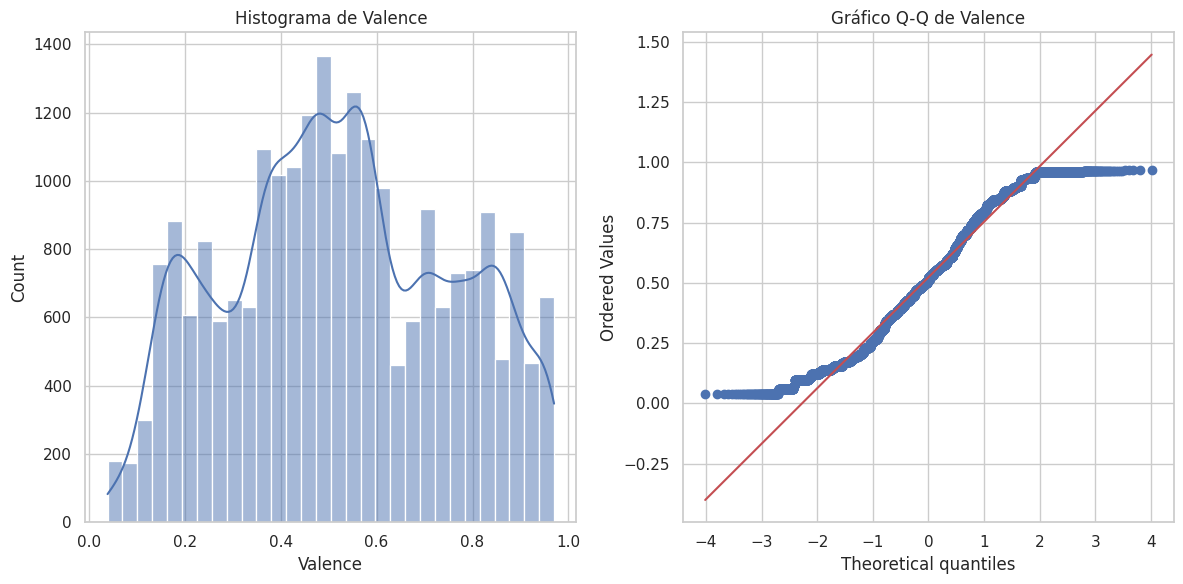

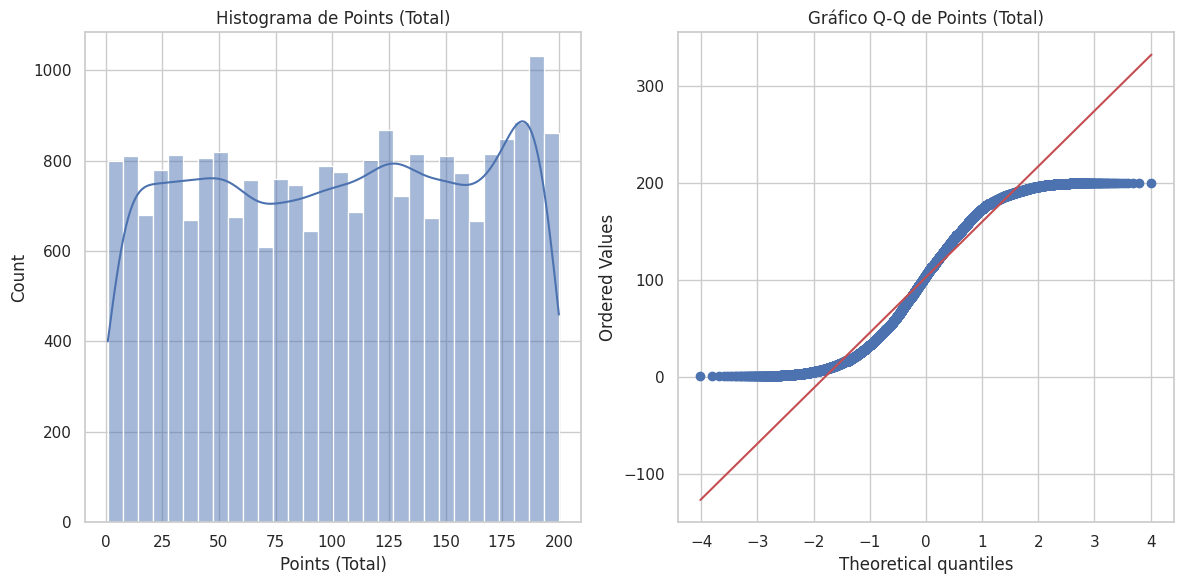

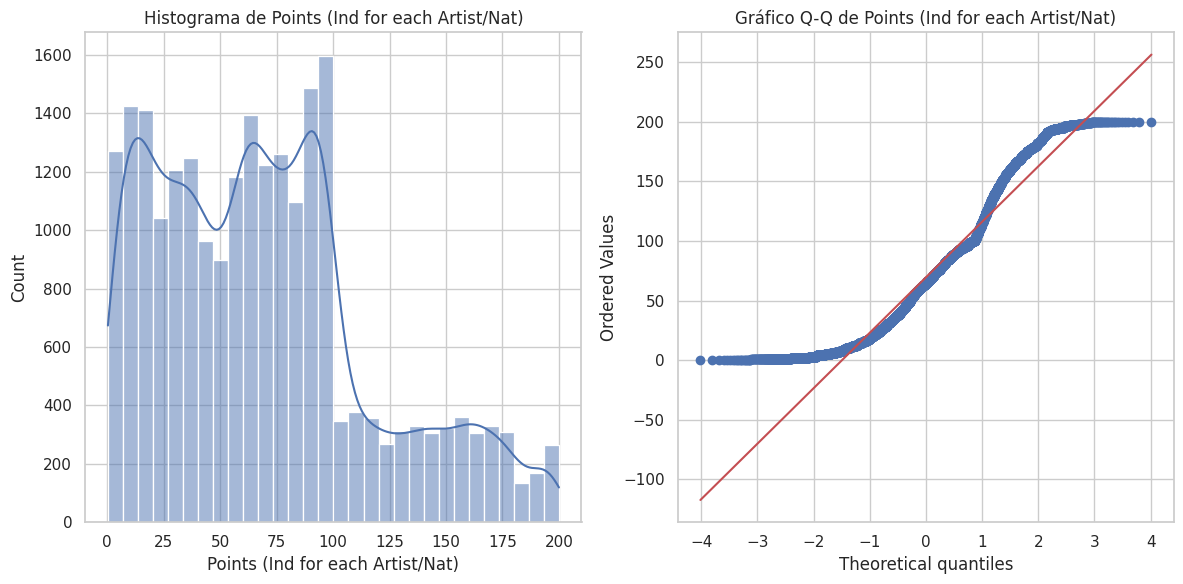

Columna: Rank
Mejor distribución: {'lognorm': {'s': 0.05916530630710399, 'loc': -895.3287003581761, 'scale': 991.7260659163023}}
---
Columna: Danceability
Mejor distribución: {'norm': {'loc': 0.6759832621543505, 'scale': 0.13204166768940678}}
---
Columna: Energy
Mejor distribución: {'norm': {'loc': 0.6563535222811786, 'scale': 0.1491631213354322}}
---
Columna: Loudness
Mejor distribución: {'gamma': {'a': 46710.131603347705, 'loc': -618245.4031866238, 'scale': 13.126791213046161}}
---
Columna: Speechiness
Mejor distribución: {'lognorm': {'s': 1.1715966512284428, 'loc': 0.022357636814184685, 'scale': 0.036856246670496556}}
---
Columna: Acousticness
Mejor distribución: {'gamma': {'a': 0.8552556516478487, 'loc': -6.743887405610056e-29, 'scale': 0.27962381722478247}}
---
Columna: Instrumentalness
Mejor distribución: {'expon': {'loc': 0.0, 'scale': 0.015029981450325696}}
---
Columna: Valence
Mejor distribución: {'lognorm': {'s': 0.044340516592404365, 'loc': -4.734842237833837, 'scale': 5.252

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from fitter import Fitter
columnas_numericas = df.select_dtypes(include=['number']).columns

# Análisis de distribuciones
resultados = {}

for col in columnas_numericas:
    # Inicializa el diccionario para almacenar resultados
    resultados[col] = {}

    # Ajustar varias distribuciones con Fitter
    f = Fitter(df[col].dropna(), distributions=['norm', 'lognorm', 'gamma', 'expon'])
    f.fit()
    resultados[col]['Mejor distribución'] = f.get_best()

    # Histograma y gráfico Q-Q
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Histograma de {col}')

    # Gráfico Q-Q
    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {col}')

    plt.tight_layout()
    plt.show()

# Mostrar resultados de ajuste
for col, res in resultados.items():
    print(f"Columna: {col}")
    print(f"Mejor distribución: {res['Mejor distribución']}")
    print("---")


#Histogramas:
#Muestran la distribución de los datos para cada columna numérica.
#Las barras representan la frecuencia de los valores en diferentes rangos.

#Gráficos Q-Q:
#Se utilizan para comparar la distribución de tus datos con una distribución teórica Normal

### Resumen de Parámetros

- **Media (`loc`)**: Punto central de la distribución.
- **Desviación estándar (`scale`)**: Indica cuán dispersos están los datos.
- **Parámetro de forma (`a` o `s`)**: Controla la forma y asimetría de la distribución.




## b. Datos Relevantes
De al menos tres columnas seleccionadas por usted, indique qué datos son relevantes de estas. Grafique la misma (puede ser dispersión o mapa de calor, otros). Indique al menos 4 características por columna seleccionada.



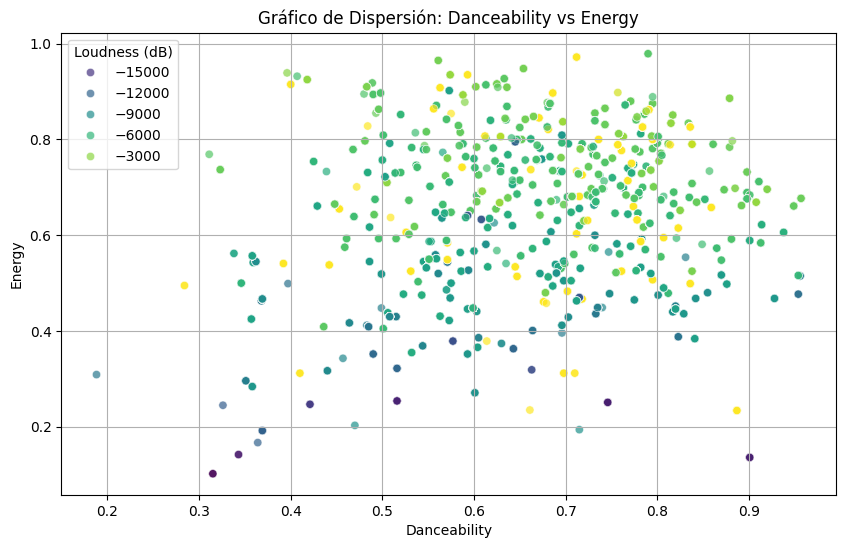

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_dispersión(df):
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(data=df, x='Danceability', y='Energy', hue='Loudness', palette='viridis', alpha=0.7)
    plt.title('Gráfico de Dispersión: Danceability vs Energy')
    plt.xlabel('Danceability')
    plt.ylabel('Energy')
    plt.legend(title='Loudness (dB)')
    plt.grid()
    plt.show()

# agrupación de puntos en la parte superior derecha (alta Danceability y alta Energy), cada punto es una cancion
graficar_dispersión(df)


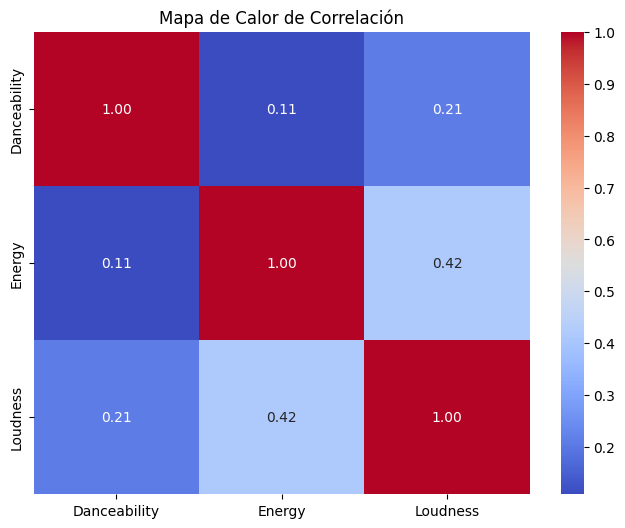

In [9]:
def graficar_mapa_calor(df):
    correlation_matrix = df[['Danceability', 'Energy', 'Loudness']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Mapa de Calor de Correlación')
    plt.show()

# describe la relación entre dos variables. Indica cómo una variable cambia en relación con otra.
# rojo fuerte
graficar_mapa_calor(df)

### 1. Columna: Danceability
- **Rango de valores:** Va de 0 a 1. Valores cercanos a 1 indican que la canción es más fácil de bailar.
- **Influencias en el género:** Diferentes géneros musicales tienden a tener diferentes niveles de `Danceability`. Por ejemplo, la música electrónica suele tener un mayor puntaje en esta métrica.
- **Interacción con el tempo:** Generalmente, canciones con un tempo más rápido tienden a tener un puntaje de `Danceability` más alto.
- **Elementos musicales:** Factores como la presencia de un ritmo claro y una estructura repetitiva pueden contribuir a un mayor `Danceability`.

### 2. Columna: Energy
- **Rango de valores:** También varía de 0 a 1. Valores cercanos a 1 indican que la canción tiene un alto nivel de energía.
- **Instrumentación:** Canciones con instrumentos más intensos (como guitarras eléctricas o tambores) suelen tener un puntaje de `Energy` más alto.
- **Impacto emocional:** La energía de una canción puede influir en su capacidad para evocar emociones fuertes en los oyentes.
- **Relación con el ritmo:** Canciones con ritmos más rápidos y dinámicos generalmente tienen un mayor puntaje de `Energy`.

### 3. Columna: Loudness
- **Medición en decibelios (dB):** Los valores suelen ser negativos (por ejemplo, -5 dB), donde un valor más bajo indica una mayor sonoridad.
- **Efecto en la percepción:** Un mayor nivel de `Loudness` puede hacer que una canción suene más intensa y atractiva para el oyente.
- **Producción musical:** La técnica de mezcla y masterización utilizada puede influir en el `Loudness` de una canción.
- **Relación con el género:** Algunos géneros, como el rock y el pop, tienden a tener un `Loudness` más alto en comparación con géneros más suaves como el jazz o la música clásica.



## c. Análisis Estadístico
Obteniendo la media, mediana y moda con el uso de librerías, grafique un diagrama de cajas-bigote de al menos 3 columnas. Explique el resultado.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Calcular media, mediana y moda
media_danceability = df['Danceability'].mean()
mediana_danceability = df['Danceability'].median()
moda_danceability = df['Danceability'].mode()[0]

media_energy = df['Energy'].mean()
mediana_energy = df['Energy'].median()
moda_energy = df['Energy'].mode()[0]

media_loudness = df['Loudness'].mean()
mediana_loudness = df['Loudness'].median()
moda_loudness = df['Loudness'].mode()[0]

# Imprimir resultados
print("Danceability - Media:", media_danceability, "Mediana:", mediana_danceability, "Moda:", moda_danceability)
print("Energy - Media:", media_energy, "Mediana:", mediana_energy, "Moda:", moda_energy)
print("Loudness - Media:", media_loudness, "Mediana:", mediana_loudness, "Moda:", moda_loudness)





Danceability - Media: 0.6759832621543505 Mediana: 0.686 Moda: 0.838
Energy - Media: 0.6563535222811786 Mediana: 0.669 Moda: 0.8
Loudness - Media: -5091.189060955092 Mediana: -5264.0 Moda: -4468.0


In [14]:
!pip install --upgrade pandas seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


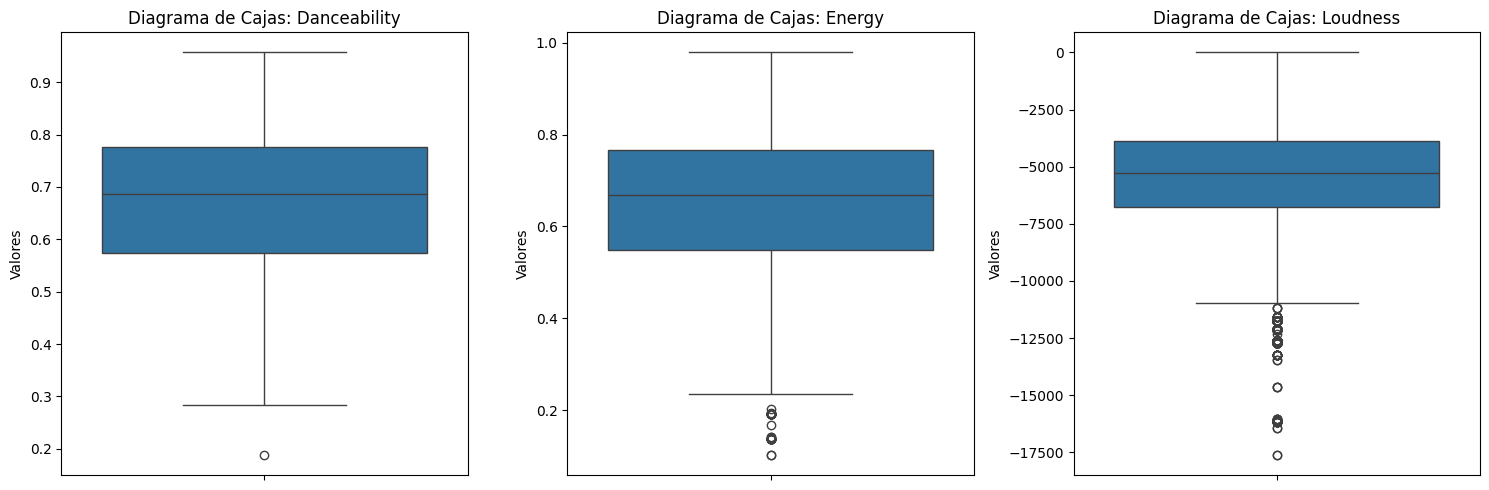

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(data, columns):
    plt.figure(figsize=(15, 5))

    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        sns.boxplot(data=data[col])
        plt.title(f'Diagrama de Cajas: {col}')
        plt.ylabel('Valores')

    plt.tight_layout()
    plt.show()

# Llama a la función con tus datos y las columnas deseadas
plot_boxplots(df, ['Danceability', 'Energy', 'Loudness'])



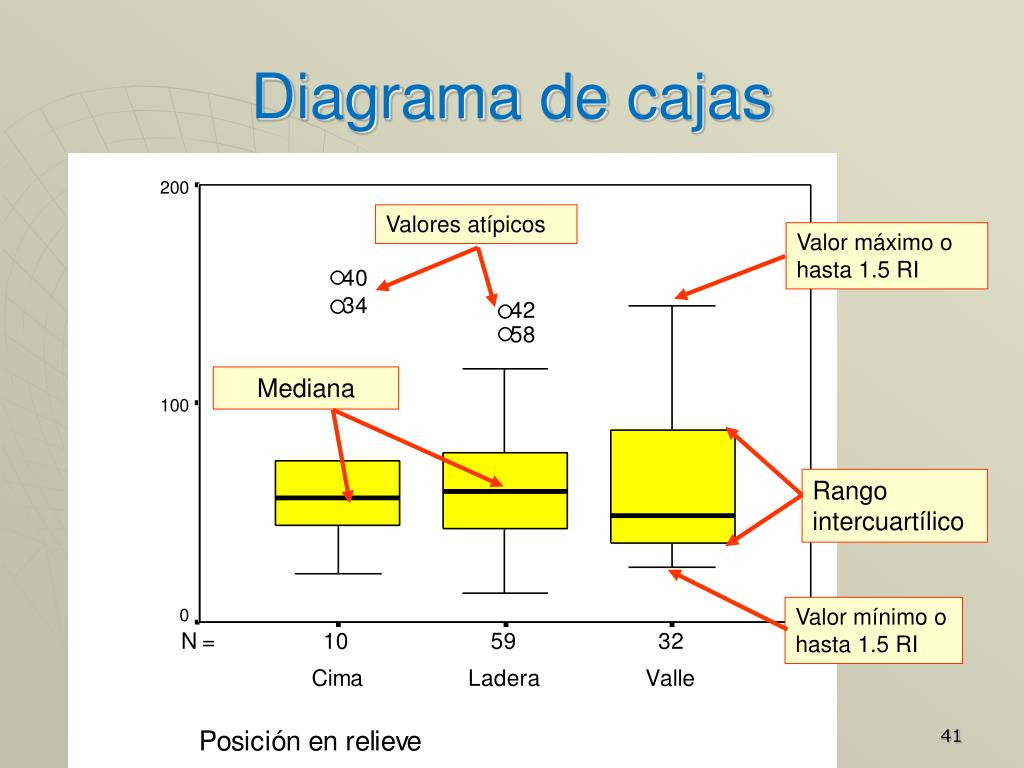